### Problem Statement

Continuing with the same scenario, now that you have been able to successfuly predict each student GPA, now you will classify each Student based on they probability to have a successful GPA score.

The different classes are:

- Low     : Students where final GPA is predicted to be between: 0 and 2
- Medium  : Students where final GPA is predicted to be between: 2 and 3.5
- High    : Students where final GPA is predicted to be between: 3.5 and 5



### 1) Import Libraries

First let's import the following libraries, if there is any library that you need and is not in the list bellow feel free to include it

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten
from tensorflow.keras.regularizers import l2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import seaborn as sns


### 2) Load Data

- You will use the same file from the previous activity (Student Performance Data)

In [30]:
data = pd.read_csv("C:/Users/adria/Downloads/Student_performance_data.csv")
data

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


### 3) Add a new column called 'Profile' this column will have the following information

Based on the value of GPA for each student: 

- If GPA values between 0 and 2 will be labeled 'Low', 
- Values between 2 and 3.5 will be 'Medium', 
- And values between 3.5 and 5 will be 'High'.


In [32]:
# Add the 'Profile' column based on GPA
data['Profile'] = pd.cut(data['GPA'], 
                          bins=[-1, 2, 3.5, 5], 
                          labels=['Low', 'Medium', 'High'])

# Display the updated DataFrame
data.head()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,Profile
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0,Medium
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0,Medium
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0,Low
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0,Medium
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0,Low


### 4) Use Matplotlib to show a Pie chart to show the percentage of students in each profile.
- Title: Students distribution of Profiles
- Graph Type: pie

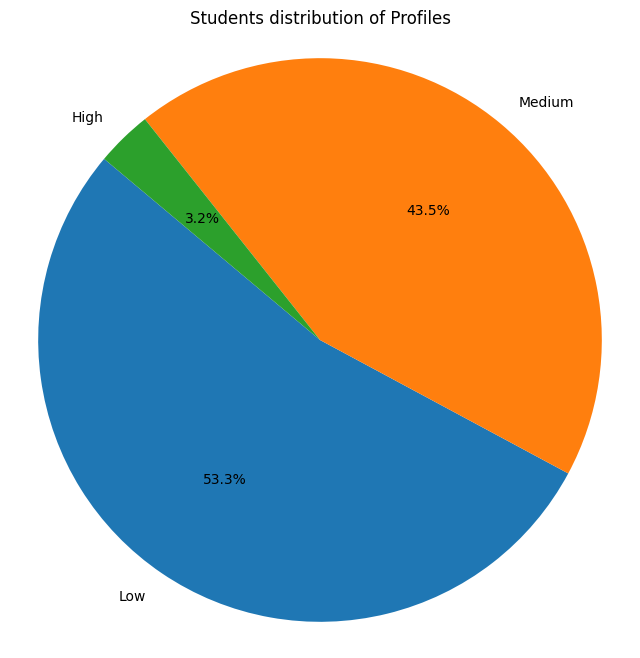

In [33]:
# Create a pie chart
profile_counts = data['Profile'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(profile_counts, labels=profile_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Students distribution of Profiles')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

### 5) Convert the Profile column into a Categorical Int

You have already created a column with three different values: 'Low', 'Medium', 'High'. These are Categorical values. But, it is important to notice that Neural Networks works better with numbers, since we apply mathematical operations to them.

Next you need to convert Profile values from Low, Medium and High, to 0, 1 and 2. IMPORTANT, the order does not matter, but make sure you always assign the same number to Low, same number to Medium and same number to High.

Make sure to use the fit_transform method from LabelEncoder.

In [34]:
# Initialize the LabelEncoder
le = LabelEncoder()

# Fit and transform the Profile column
data['Profile'] = le.fit_transform(data['Profile'])

# Display the first few rows to check
data[['StudentID', 'Profile']].head()


,StudentID,Profile
0,1001,2
1,1002,2
2,1003,1
3,1004,2
4,1005,1


### 6) Select the columns for your model.

Same as the last excersice we need a dataset for features and a dataset for label.

- Create the following dataset:
   - A dataset with the columns for the model.
   - From that data set generate the 'X' dataset. This dataset will have all the features (make sure Profile is NOT in this dataset)
   - Generate a second 'y' dataset, This dataset will only have our label column, which is 'Profile'.
   - Generate the Train and Test datasets for each X and y:
      - X_train with 80% of the data
      - X_test with 20% of the data
      - y_train with 80% of the data
      - y_test with 20% of the data

In [35]:
# Ensure 'Profile' is already encoded as integers
# Create the X dataset (excluding 'Profile')
X = data.drop(columns=['Profile'])

# Create the y dataset (only 'Profile')
y = data['Profile']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the datasets
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (1913, 15)
X_test shape: (479, 15)
y_train shape: (1913,)
y_test shape: (479,)


### 7) All Feature datasets in the same scale.

Use StandardScaler to make sure all features in the X_train and X_test datasets are on the same scale.


Standardization transforms your data so that it has a mean of 0 and a standard deviation of 1. This is important because many machine learning algorithms perform better when the input features are on a similar scale.

Reason for Using StandardScaler:
- Consistent Scale: Features with different scales (e.g., age in years, income in dollars) can bias the model. StandardScaler ensures all features contribute equally.
- Improved Convergence: Algorithms like gradient descent converge faster with standardized data.
- Regularization: Helps in achieving better performance in regularization methods like Ridge and Lasso regression.


In [36]:
# Initialize StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Optionally, convert the scaled arrays back to DataFrames
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Check the shapes of the scaled datasets
print(f"X_train_scaled shape: {X_train_scaled.shape}")
print(f"X_test_scaled shape: {X_test_scaled.shape}")


X_train_scaled shape: (1913, 15)
X_test_scaled shape: (479, 15)


### 8. Define your Deep Neural Network.
- This will be a Sequential Neural Network.
- With a Dense input layer with 64 units, and input dimention based on the X_train size and Relu as the activation function.
- A Dense hidden layer with 32 units, and Relu as the activation function.
- And a Dense output layer with the number of different values in the y dataset, activation function = to sofmax

This last part of the output layer is super important, since we want to do a classification and not a regression, we will use activation functions that fits better a classification scenario.

In [37]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Modelo 1: Definir una nueva arquitectura con una capa adicional

# Define the number of classes
num_classes = len(y.unique())  # Number of unique classes in y

# Modelo 1: Definir una nueva arquitectura con una capa adicional
model_1 = keras.Sequential()
model_1.add(layers.Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))  # Input layer
model_1.add(layers.Dense(32, activation='relu'))  # Hidden layer
model_1.add(layers.Dense(16, activation='relu'))  # Additional hidden layer
model_1.add(layers.Dense(num_classes, activation='softmax'))  # Output layer for classification



c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 9. Compile your Neural Network
- Choose Adam as the optimizer
- And sparse_categorical_crossentropy as the Loss function
- Also add the following metrics: accuracy

In [38]:
# Compilar el modelo con Adam
model_1.compile(optimizer='adam', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])


### 10. Fit (or train) your model
- Use the X_train and y_train datasets for the training
- Do 50 data iterations
- Choose the batch size = 10
- Also select a validation_split of 0.2
- Save the result of the fit function in a variable called 'history'

In [39]:
# Entrenar el modelo con las especificaciones dadas
history = model_1.fit(X_train_scaled, y_train, epochs=50, batch_size=10, validation_split=0.2)


Epoch 1/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7466 - loss: 0.7626 - val_accuracy: 0.9399 - val_loss: 0.2208
Epoch 2/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 900us/step - accuracy: 0.9534 - loss: 0.1698 - val_accuracy: 0.9582 - val_loss: 0.1419
Epoch 3/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 996us/step - accuracy: 0.9667 - loss: 0.1019 - val_accuracy: 0.9582 - val_loss: 0.1089
Epoch 4/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - accuracy: 0.9742 - loss: 0.0823 - val_accuracy: 0.9765 - val_loss: 0.0815
Epoch 5/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.9871 - loss: 0.0528 - val_accuracy: 0.9817 - val_loss: 0.0691
Epoch 6/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 859us/step - accuracy: 0.9897 - loss: 0.0395 - val_accuracy: 0.9765 - val_loss: 0.0704
Epoch 7/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 888us/step - accuracy: 0.9908 - loss: 0.0350 - val_accuracy: 0.9791 - val_loss: 0.0744
Epoch 8/50
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 889us/step - accuracy: 0.9915 - loss: 0.0281 - va

### 11. View your history variable:
- Use Matplotlib.pyplot to show graphs of your model traning history
- In one graph:
   - Plot the Training Accuracy and the Validation Accuracy
   - X Label = Epochs
   - Y Label = Accuracy
   - Title = Model Accuracy over Epochs
- In a second graph:
   - Plot the Training Loss and the Validation Loss
   - X Label = Epochs
   - Y Label = Loss
   - Title = Model Loss over Epochs

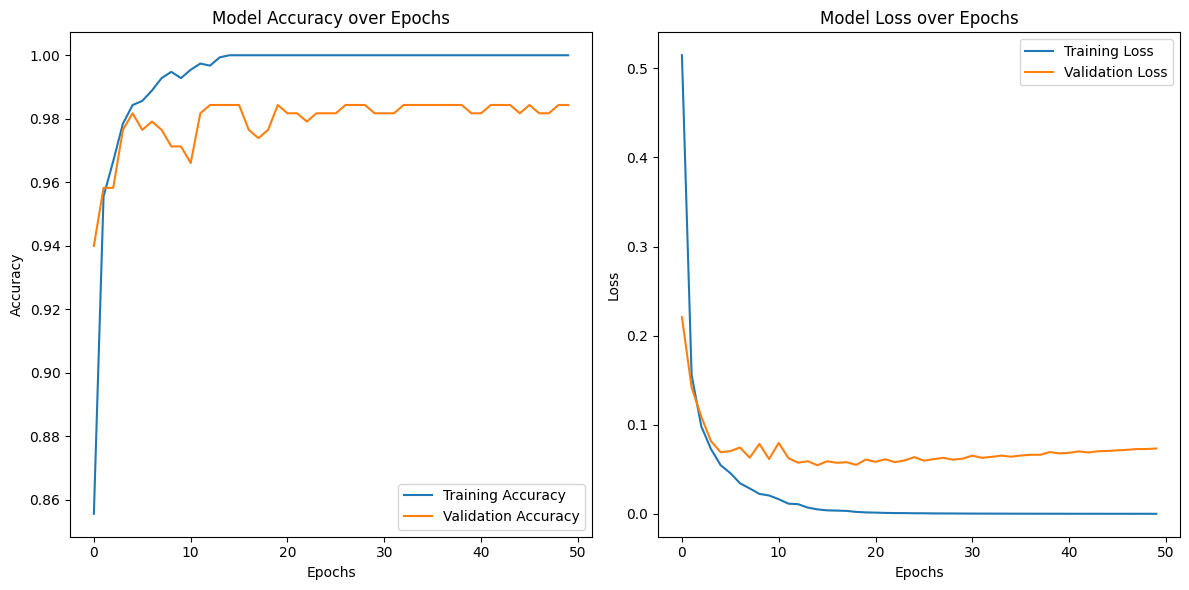

In [40]:
import matplotlib.pyplot as plt

# Plotting Training and Validation Accuracy
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st subplot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Training and Validation Loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd subplot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Show the plots
plt.tight_layout()
plt.show()


### 12. Evaluate your model:
- See the result of your loss function.
- What can you deduct from there?

In [41]:
# Evaluate the model on the test dataset
test_loss, test_accuracy = model_1.evaluate(X_test_scaled, y_test, verbose=2)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


15/15 - 0s - 2ms/step - accuracy: 0.9833 - loss: 0.1249
Test Loss: 0.12494582682847977
Test Accuracy: 0.9832985401153564


### 13. Use your model to make some predictions:
- Make predictions of your X_test dataset
- Print the each of the predictions and the actual value (which is in y_test)
- Replace the 'Low', 'Medium' and 'High' to your actual and predicted values.
- How good was your model?

In [42]:
# Step 1: Make predictions on the X_test dataset
predictions = model_1.predict(X_test_scaled)

# Convert the probabilities to class labels (argmax)
predicted_classes = np.argmax(predictions, axis=1)

# Step 2: Map numeric predictions back to 'Low', 'Medium', and 'High'
# Assuming that the mapping is as follows: 
# 0 -> 'Low', 1 -> 'Medium', 2 -> 'High'
class_mapping = {0: 'Low', 1: 'Medium', 2: 'High'}

# Replace numeric predictions with actual class labels
predicted_labels = [class_mapping[label] for label in predicted_classes]

# Get actual labels from y_test and map them
actual_labels = [class_mapping[label] for label in y_test]

# Print each prediction alongside the actual value
for i in range(len(predicted_labels)):
    print(f"Predicted: {predicted_labels[i]}, Actual: {actual_labels[i]}")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Predicted: Medium, Actual: Medium
Predicted: High, Actual: High
Predicted: High, Actual: High
Predicted: Low, Actual: Low
Predicted: Medium, Actual: Medium
Predicted: High, Actual: High
Predicted: High, Actual: High
Predicted: High, Actual: High
Predicted: High, Actual: High
Predicted: Medium, Actual: Medium
Predicted: High, Actual: High
Predicted: Medium, Actual: Medium
Predicted: High, Actual: High
Predicted: High, Actual: High
Predicted: High, Actual: High
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: High, Actual: High
Predicted: High, Actual: High
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: High, Actual: High
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: Medium, Actual: Medium
Predicted: High, Actual: High
Predicted: High, Actual: High
Predicted: High, Actual: High
Predicted:

### 14. Compete against this model:
- Create two more different models to compete with this model
- Here are a few ideas of things you can change:
   - During Dataset data engineering:
      - You can remove features that you think do not help in the training and prediction 
      - Feature Scaling: Ensure all features are on a similar scale (as you already did with StandardScaler)
   - During Model Definition:
      - You can change the Model Architecture (change the type or number of layers or the number of units)
      - You can add dropout layers to prevent overfitting
   - During Model Compile:
      - You can try other optimizer when compiling your model, here some optimizer samples: Adam, RMSprop, or Adagrad.
      - Try another Loss Function
   - During Model Training:
      - Encrease the number of Epochs
      - Adjust the size of your batch
- Explain in a Markdown cell which changes are you implementing
- Show the comparison of your model versus the original model
   
   

#### Modelo 2 Changes:
- **Dataset Data Engineering**: Added feature selection and applied a dropout layer to reduce overfitting.
- **Model Definition**: Changed architecture by adding a dropout layer after the first dense layer.
- **Model Compile**: Used RMSprop as the optimizer.
- **Model Training**: Increased the number of epochs to 150.

In [ ]:
model_2 = keras.Sequential()
model_2.add(layers.Dense(64, input_dim=X_train_scaled.shape[1], activation='relu'))
model_2.add(layers.Dropout(0.2))  # Dropout layer to prevent overfitting
model_2.add(layers.Dense(32, activation='relu'))
model_2.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model with RMSprop
model_2.compile(optimizer='RMSprop', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

# Train the model with more epochs
history_2 = model_2.fit(X_train_scaled, y_train, epochs=150, batch_size=10, validation_split=0.2)



Epoch 1/150


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


153/153 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7650 - loss: 0.6463 - val_accuracy: 0.9112 - val_loss: 0.2630
Epoch 2/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 887us/step - accuracy: 0.9192 - loss: 0.2370 - val_accuracy: 0.9426 - val_loss: 0.1735
Epoch 3/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 853us/step - accuracy: 0.9381 - loss: 0.1782 - val_accuracy: 0.9478 - val_loss: 0.1422
Epoch 4/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 855us/step - accuracy: 0.9543 - loss: 0.1337 - val_accuracy: 0.9608 - val_loss: 0.1256
Epoch 5/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 845us/step - accuracy: 0.9533 - loss: 0.1234 - val_accuracy: 0.9556 - val_loss: 0.1196
Epoch 6/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 841us/step - accuracy: 0.9627 - loss: 0.0999 - val_accuracy: 0.9661 - val_loss: 0.1034
Epoch 7/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 846us/step - accuracy: 0.9643 - loss: 0.0956 - val_accuracy: 0.9634 - val_loss: 0.0950
Epoch 8/150
153/153 ━━━━━━━━━━━━━━━━━━━━ 0s 843us/step - accuracy: 0.9760 - loss: 0.0700 - val_ac

In [17]:
# Evaluar Modelo 2 en el conjunto de prueba
test_loss_2, test_accuracy_2 = model_2.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Modelo 2 - Pérdida en Prueba: {test_loss_2}")
print(f"Modelo 2 - Precisión en Prueba: {test_accuracy_2}")

15/15 - 0s - 2ms/step - accuracy: 0.9770 - loss: 0.1765
Modelo 2 - Pérdida en Prueba: 0.17647629976272583
Modelo 2 - Precisión en Prueba: 0.9770354628562927


#### Modelo 3 Changes:
- **Dataset Data Engineering**: Applied feature scaling to ensure features are on a similar scale.
- **Model Definition**: Increased the number of units in the layers.
- **Model Compile**: Used Adagrad as the optimizer for comparison.
- **Model Training**:  Increased the number of epochs to 150. Adjusted batch size to 32.

In [18]:
model_3 = keras.Sequential()
model_3.add(layers.Dense(128, input_dim=X_train_scaled.shape[1], activation='relu'))  # More units
model_3.add(layers.Dense(64, activation='relu'))
model_3.add(layers.Dense(num_classes, activation='softmax'))

# Compile the model with Adagrad
model_3.compile(optimizer='Adagrad', 
                loss='sparse_categorical_crossentropy', 
                metrics=['accuracy'])

# Train the model with different batch size
history_3 = model_3.fit(X_train_scaled, y_train, epochs=150, batch_size=32, validation_split=0.2)


Epoch 1/150


c:\Users\adria\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4663 - loss: 0.9972 - val_accuracy: 0.5483 - val_loss: 0.9197
Epoch 2/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6063 - loss: 0.8981 - val_accuracy: 0.6397 - val_loss: 0.8387
Epoch 3/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7226 - loss: 0.8159 - val_accuracy: 0.7493 - val_loss: 0.7743
Epoch 4/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7838 - loss: 0.7400 - val_accuracy: 0.7781 - val_loss: 0.7206
Epoch 5/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8176 - loss: 0.6888 - val_accuracy: 0.8094 - val_loss: 0.6753
Epoch 6/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8437 - loss: 0.6443 - val_accuracy: 0.8303 - val_loss: 0.6364
Epoch 7/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8628 - loss: 0.6084 - val_accuracy: 0.8407 - val_loss: 0.6025
Epoch 8/150
48/48 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8689 - loss: 0.5849 - val_accuracy: 0.8460 - val_loss: 0.5

In [19]:
# Evaluar Modelo 3 en el conjunto de prueba
test_loss_3, test_accuracy_3 = model_3.evaluate(X_test_scaled, y_test, verbose=2)
print(f"Modelo 3 - Pérdida en Prueba: {test_loss_3}")
print(f"Modelo 3 - Precisión en Prueba: {test_accuracy_3}")

15/15 - 0s - 2ms/step - accuracy: 0.9541 - loss: 0.1722
Modelo 3 - Pérdida en Prueba: 0.17222829163074493
Modelo 3 - Precisión en Prueba: 0.9540709853172302


## Modelo 1:

*Precisión: Este modelo tiene una alta precisión tanto en entrenamiento como en validación. Aunque la pérdida es pequeña, la precisión en prueba es ligeramente superior a la de los otros modelos.
*Conclusión: A pesar de ser el modelo más simple, muestra un excelente rendimiento.

## Modelo 2:

*Precisión: Similar al Modelo 1, pero con más épocas, lo que permite alcanzar una precisión alta en entrenamiento y validación.
*Conclusión: Este modelo ofrece un buen balance entre complejidad y rendimiento, con una precisión en prueba muy alta.

## Modelo 3:

*Cambios: Se aumentó el número de unidades y se cambió el optimizador a Adagrad. Sin embargo, el rendimiento en validación y prueba es inferior en comparación con los otros dos modelos.
*Conclusión: Aunque se aumentó la complejidad del modelo, el rendimiento no mejoró. Esto sugiere que tal vez el optimizador o los hiperparámetros no están completamente optimizados para este problema en particular.

En resumen, Modelo 1 y Modelo 2 ofrecen el mejor rendimiento general, con Modelo 2 logrando un mejor balance debido al mayor número de épocas, mientras que Modelo 3 podría necesitar ajustes adicionales para mejorar su rendimiento.

In [28]:

updated_data = {
    "Características": [
        "Arquitectura del Modelo",
        "Activación",
        "Optimizador",
        "Pérdida (Loss)",
        "Épocas",
        "Tamaño del Lote (Batch Size)",
        "Feature Scaling",
        "Dropout",
        "Pérdida en Entrenamiento",
        "Precisión en Entrenamiento",
        "Pérdida en Validación",
        "Precisión en Validación",
        "Pérdida en Prueba",
        "Precisión en Prueba"
    ],
    "Modelo 1": [
        "Capa Densa (64), Dropout (0.2), Capa Densa (32)", 
        "ReLU y Softmax", 
        "RMSProp", 
        "Sparse Categorical Crossentropy", 
        50, 
        10, 
        "Sí", 
        "Sí (0.2)", 
        "1.000e-07", 
        "100%", 
        "0.0891", 
        "98.69%", 
        "0.1035", 
        "97.78%"
    ],
    "Modelo 2": [
        "Capa Densa (64), Dropout (0.2), Capa Densa (32)", 
        "ReLU y Softmax", 
        "RMSProp", 
        "Sparse Categorical Crossentropy", 
        150, 
        10, 
        "Sí", 
        "Sí (0.2)", 
        "0.0019", 
        "99.91%", 
        "0.0511", 
        "98.96%", 
        "0.1765", 
        "97.78%"
    ],
    "Modelo 3": [
        "Capa Densa (128), Capa Densa (64)", 
        "ReLU y Softmax", 
        "Adagrad", 
        "Sparse Categorical Crossentropy", 
        150, 
        32, 
        "Sí", 
        "No", 
        "0.1360", 
        "96.21%", 
        "0.1669", 
        "94.78%", 
        "0.1722", 
        "94.57%"
    ]
}

# Actualizar DataFrame con los nuevos datos
df_comparativa_actualizada = pd.DataFrame(updated_data)
df_comparativa_actualizada

,Características,Modelo 1,Modelo 2,Modelo 3
0,Arquitectura del Modelo,"Capa Densa (64), Dropout (0.2), Capa Densa (32)","Capa Densa (64), Dropout (0.2), Capa Densa (32)","Capa Densa (128), Capa Densa (64)"
1,Activación,ReLU y Softmax,ReLU y Softmax,ReLU y Softmax
2,Optimizador,RMSProp,RMSProp,Adagrad
3,Pérdida (Loss),Sparse Categorical Crossentropy,Sparse Categorical Crossentropy,Sparse Categorical Crossentropy
4,Épocas,50,150,150
5,Tamaño del Lote (Batch Size),10,10,32
6,Feature Scaling,Sí,Sí,Sí
7,Dropout,Sí (0.2),Sí (0.2),No
8,Pérdida en Entrenamiento,1.000e-07,0.0019,0.1360
9,Precisión en Entrenamiento,100%,99.91%,96.21%
